In [1]:
from importlib import reload

from src.GEF import GEF as GEFNew
from src.GEFClassic.GEFClassic import GEF as GEFOld

import src.Tools.ModeByMode
reload(src.Tools.ModeByMode)
from src.Tools.ModeByMode import ModeByMode, ReadMode

import numpy as np
from scipy.interpolate import CubicSpline
from scipy.integrate import simpson, trapezoid, quad, OdeSolution
import matplotlib.pyplot as plt

from src.Tools.timer import Timer

In [2]:
#common parameters
beta = 30
m = 6.16e-8
phi = 15.55
dphi = -np.sqrt(2/3)*m
V = lambda x: 1/2*m**2*x**2
dV = lambda x: m**2*x

ntr = 150
tend = 120
atol = 1e-20
rtol = 1e-6
reachNend = True


In [3]:
G = GEFNew("Classic", beta, {"phi":phi, "dphi":dphi}, {"V":V, "dV":dV})

/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/GEF.py:173: UserWarning: No default value set for 'kh'
  warnings.warn(f"No default value set for '{key}'")


In [4]:
sol = G.Solver.RunGEF(ntr, 60, atol=atol, rtol=rtol, nmodes=500, printstats=True,
                        ensureConvergence=False, reachNend=True, maxattempts=3)

The solver aims at reaching t=60 with ntr=150.
The end of inflation was not reached by the solver. Increasing tend by 10.0 to 70.0.
The end of inflation was not reached by the solver. Increasing tend by 12.0 to 82.0.
The end of inflation was not reached by the solver. Increasing tend by 15.0 to 97.0.
The end of inflation was not reached by the solver. Increasing tend by 24.0 to 121.0.


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/EoMsANDFunctions/Utility.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x/eps))


The end of inflation was not reached by the solver. Increasing tend by 44.0 to 165.0.
The end of inflation was not reached by the solver. Increasing tend by 97.0 to 262.0.
The end of inflation was not reached by the solver. Increasing tend by 333.0 to 595.0.
End of inflation at t=[265.8] and N=[68.2].
Finishing
Using last successful GEF solution to compute gauge-field mode functions.
Performing mode-by-mode comparison with GEF results.
The mode-by-mode comparison finds the following relative deviations from the GEF solution:
-- E --
maximum relative deviation: 48.3% at N=67.6
final relative deviation: 48.3% at N=67.6
-- B --
maximum relative deviation: 80.7% at N=67.6
final relative deviation: 80.7% at N=67.6
-- G --
maximum relative deviation: 72.6% at N=67.6
final relative deviation: 72.6% at N=67.6
Attempting to solve GEF using self-correction starting from N=65.6.


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/Tools/ModeByMode.py:443: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val, err = quad(f, -200, 0., epsabs=epsabs, epsrel=epsrel)


The solver aims at reaching t=595.0 with ntr=150.
End of inflation at t=[239.5] and N=[67.7].
Finishing
Using last successful GEF solution to compute gauge-field mode functions.
Performing mode-by-mode comparison with GEF results.
The mode-by-mode comparison finds the following relative deviations from the GEF solution:
-- E --
maximum relative deviation: 1.8% at N=65.1
final relative deviation: 0.2% at N=67.1
-- B --
maximum relative deviation: 1.9% at N=65.1
final relative deviation: 0.0% at N=67.1
-- G --
maximum relative deviation: 1.9% at N=64.1
final relative deviation: 0.1% at N=67.1
The mode-by-mode comparison indicates a convergent GEF run.
GEF run successfully completed.
The run terminated with the following statistics:
nfev : 59888
njev : 0
nlu : 0
status : 1
message : A termination event occurred.
success : True
The following events occured during the run:
End of inflation at t=[239.5] or N=[67.654]


In [5]:
G.Solver.ParseArrToUnitSystem(sol.t, sol.y, G)

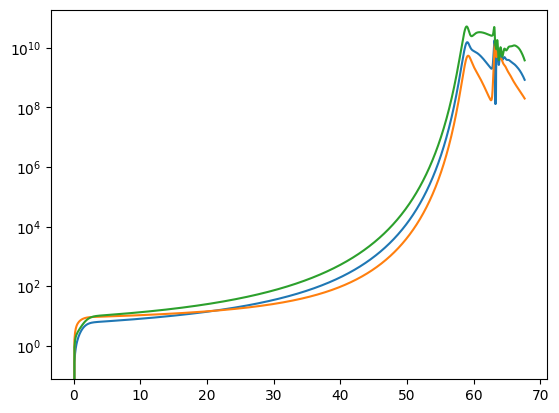

In [6]:
plt.plot(G.N, abs(G.G))
plt.plot(G.N, abs(G.B))
plt.plot(G.N, abs(G.E))
plt.yscale("log")

In [7]:
import src.Tools.ModeByMode
reload(src.Tools.ModeByMode)
from src.Tools.ModeByMode import ModeByMode, ReadMode

In [8]:
M = ModeByMode(G, {})
logks = M.WavenumberArray(500)
ks, tstart = M.InitialKTN(np.exp(logks), "k")

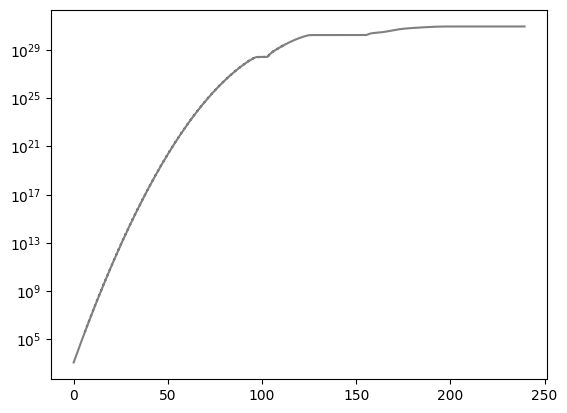

In [9]:
plt.plot(tstart, ks, "k:")
plt.plot(G.t, 10**(5/2)*G.kh, "gray")
plt.yscale("log")

In [10]:
#common parameters
beta = 25
m = 6.16e-6
phi = 15.55
dphi = -np.sqrt(2/3)*m
V = lambda x: 1/2*m**2*x**2
dV = lambda x: m**2*x

ntr = 90
tend = 120
atol = 1e-20
rtol = 1e-6
reachNend = True

In [11]:
GN = GEFNew("Classic", beta, {"phi":phi, "dphi":dphi}, {"V":V, "dV":dV},
             GEFData="Out/GEFTesting.dat", ModeData="Modes/MbMTesting.dat")

In [12]:
"""try:
    GN.LoadGEFData()
except:
    sol = GN.RunGEF(ntr, tend=tend, atol=atol, rtol=rtol, reachNend=reachNend, ensureConvergence=False, ModeCrossCheck=False)
    GN.SaveGEFData()"""
sol = GN.RunGEF(ntr, tend=tend, atol=atol, rtol=rtol, reachNend=reachNend, ensureConvergence=False, ModeCrossCheck=False)
GN.SaveGEFData()


AttributeError: 'GEF' object has no attribute 'RunGEF'

In [ ]:
MbM = ModeByMode(GN, GN.settings)
try:
    teval, Neval, ks, Ap, dAp, Am, dAm = ReadMode(GN.ModeData)
except:
    nmodes = 500
    teval, Neval, ks, Ap, dAp, Am, dAm = MbM.ComputeModeSpectrum(nmodes, rtol=rtol)
    MbM.SaveMode(teval, ks, Ap, dAp, Am, dAm, GN.ModeData)

In [ ]:
inds = np.array([500, 550, 560, 575])
cols = ["red", "blue", "green", "yellow"]
Ns = Neval[inds]

In [ ]:
self = GN
ntr = self.Solver.ntr
#Create array of initial data at time t
ind = inds[0]
Temps = []
yinis = []
for ind in inds:
    t = teval[ind]
    modes = [Ap[:,ind], Am[:,ind], dAp[:,ind], dAm[:,ind]]
    yini = np.zeros((sol.y.shape[0]))
    for i in range(sol.y.shape[0]):
        yini[i] = CubicSpline(sol.t, sol.y[i,:])(t)
        
    #Create temporary value system using yini
    Temp = self.CreateCopySystem()
    self.Solver.ParseArrToUnitSystem(t, yini, Temp)
    #reiinitialise Temp using "Initialise" to zero out all GEF-bilinear values
    ytmp = self.Solver.Initialise(Temp, ntr)
   
    gaugeinds = np.where(ytmp==0.)[0]

    # compute En, Bn, Gn, for n>1 from Modes
    yini[gaugeinds[3:]] = np.array(
                                [MbM.EBGnFromModes(t, ks, modes[0], modes[1], modes[2], modes[3], n=n,
                                                    epsabs=1e-20, epsrel=rtol*1e-2)[0]
                                  for n in range(1,ntr+1)]
                                ).reshape(3*ntr)

    GN.Solver.ParseArrToUnitSystem(t, yini, Temp)
    soltemp = GN.Solver.SolveGEF(t, yini, Temp, reachNend=True)
    GN.Solver.ParseArrToUnitSystem(soltemp.t, soltemp.y, Temp)
    yinis.append(yini)
    Temps.append(Temp)







The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.4] and N=[67.2].
Finishing
The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.2] and N=[67.2].
Finishing
The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.] and N=[67.2].
Finishing
The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.] and N=[67.2].
Finishing


In [ ]:
#rtol/100
keys = GN.ValuesList()

#fig, ax  = plt.subplots(len(keys), 1, sharex=True, figsize=(10,5*len(keys)))
loglist = ["kh", "E", "B", "a"]
"""for i, key in enumerate(keys):
    ax[i].set_ylabel(getattr(GN, key).name)
    if key in loglist:
        ax[i].plot(GN.t, abs(getattr(GN, key)), "gray")
    else:
        ax[i].plot(GN.t, getattr(GN, key), "gray")"""

Temps = []
yinis = []

for l, ind in enumerate(inds):
    GN.SetUnits(False)
    t = teval[ind]
    N = Neval[ind]
    print(t)
    phi = CubicSpline(GN.t, GN.phi)(t)
    dphi = CubicSpline(GN.t, GN.dphi)(t)
    logkh = np.log(CubicSpline(GN.t, GN.kh)(t))
    E = CubicSpline(GN.t, GN.E)(t)
    B = CubicSpline(GN.t, GN.B)(t)
    G = CubicSpline(GN.t, GN.G)(t)
    res = []
    err = []
    for n in range(1,ntr+1):
        vals, errs = MbM.EBGnFromModes(t, ks, Ap[:,ind], Am[:,ind], dAp[:,ind], dAm[:,ind], n=n, epsabs=atol, epsrel=rtol*1e-2)
        res.append(vals)
        err.append(errs)
    res = np.array(res)
    err = np.array(err)

    t0 = t
    yini = np.ones((4+3*(ntr+1)))
    yini[0] = N
    yini[1] = phi
    yini[2] = dphi
    yini[3] = logkh
    yini[4] = E*np.exp(-4*(logkh-N))
    yini[5] = B*np.exp(-4*(logkh-N))
    yini[6] = G*np.exp(-4*(logkh-N))
    yini[7:] = res.reshape(3*(ntr))
    
    yinis.append(yini)

    Temp = GN.CreateCopySystem()
    GN.Solver.ParseArrToUnitSystem(t0, yini, Temp)
    GN.Solver.tend=300
    GN.Solver.ntr=ntr
    GN.Solver.atol=atol
    GN.Solver.rtol=rtol

    soltemp = GN.Solver.SolveGEF(t0, yini, Temp, reachNend=True)
    GN.Solver.ParseArrToUnitSystem(soltemp.t, soltemp.y, Temp)

    Temps.append(Temp)
    


83.81787282146595


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/Tools/ModeByMode.py:445: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val, err = quad(f, -200, 0., epsabs=epsabs, epsrel=epsrel)


The solver aims at reaching t=300 with ntr=90.


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/SolverFunctions/Utility.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x/eps))


End of inflation at t=[222.4] and N=[67.2].
Finishing
104.24129640994283
The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.2] and N=[67.2].
Finishing
109.8985576907234
The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.] and N=[67.2].
Finishing
121.21643691456411
The solver aims at reaching t=300 with ntr=90.
End of inflation at t=[222.] and N=[67.2].
Finishing


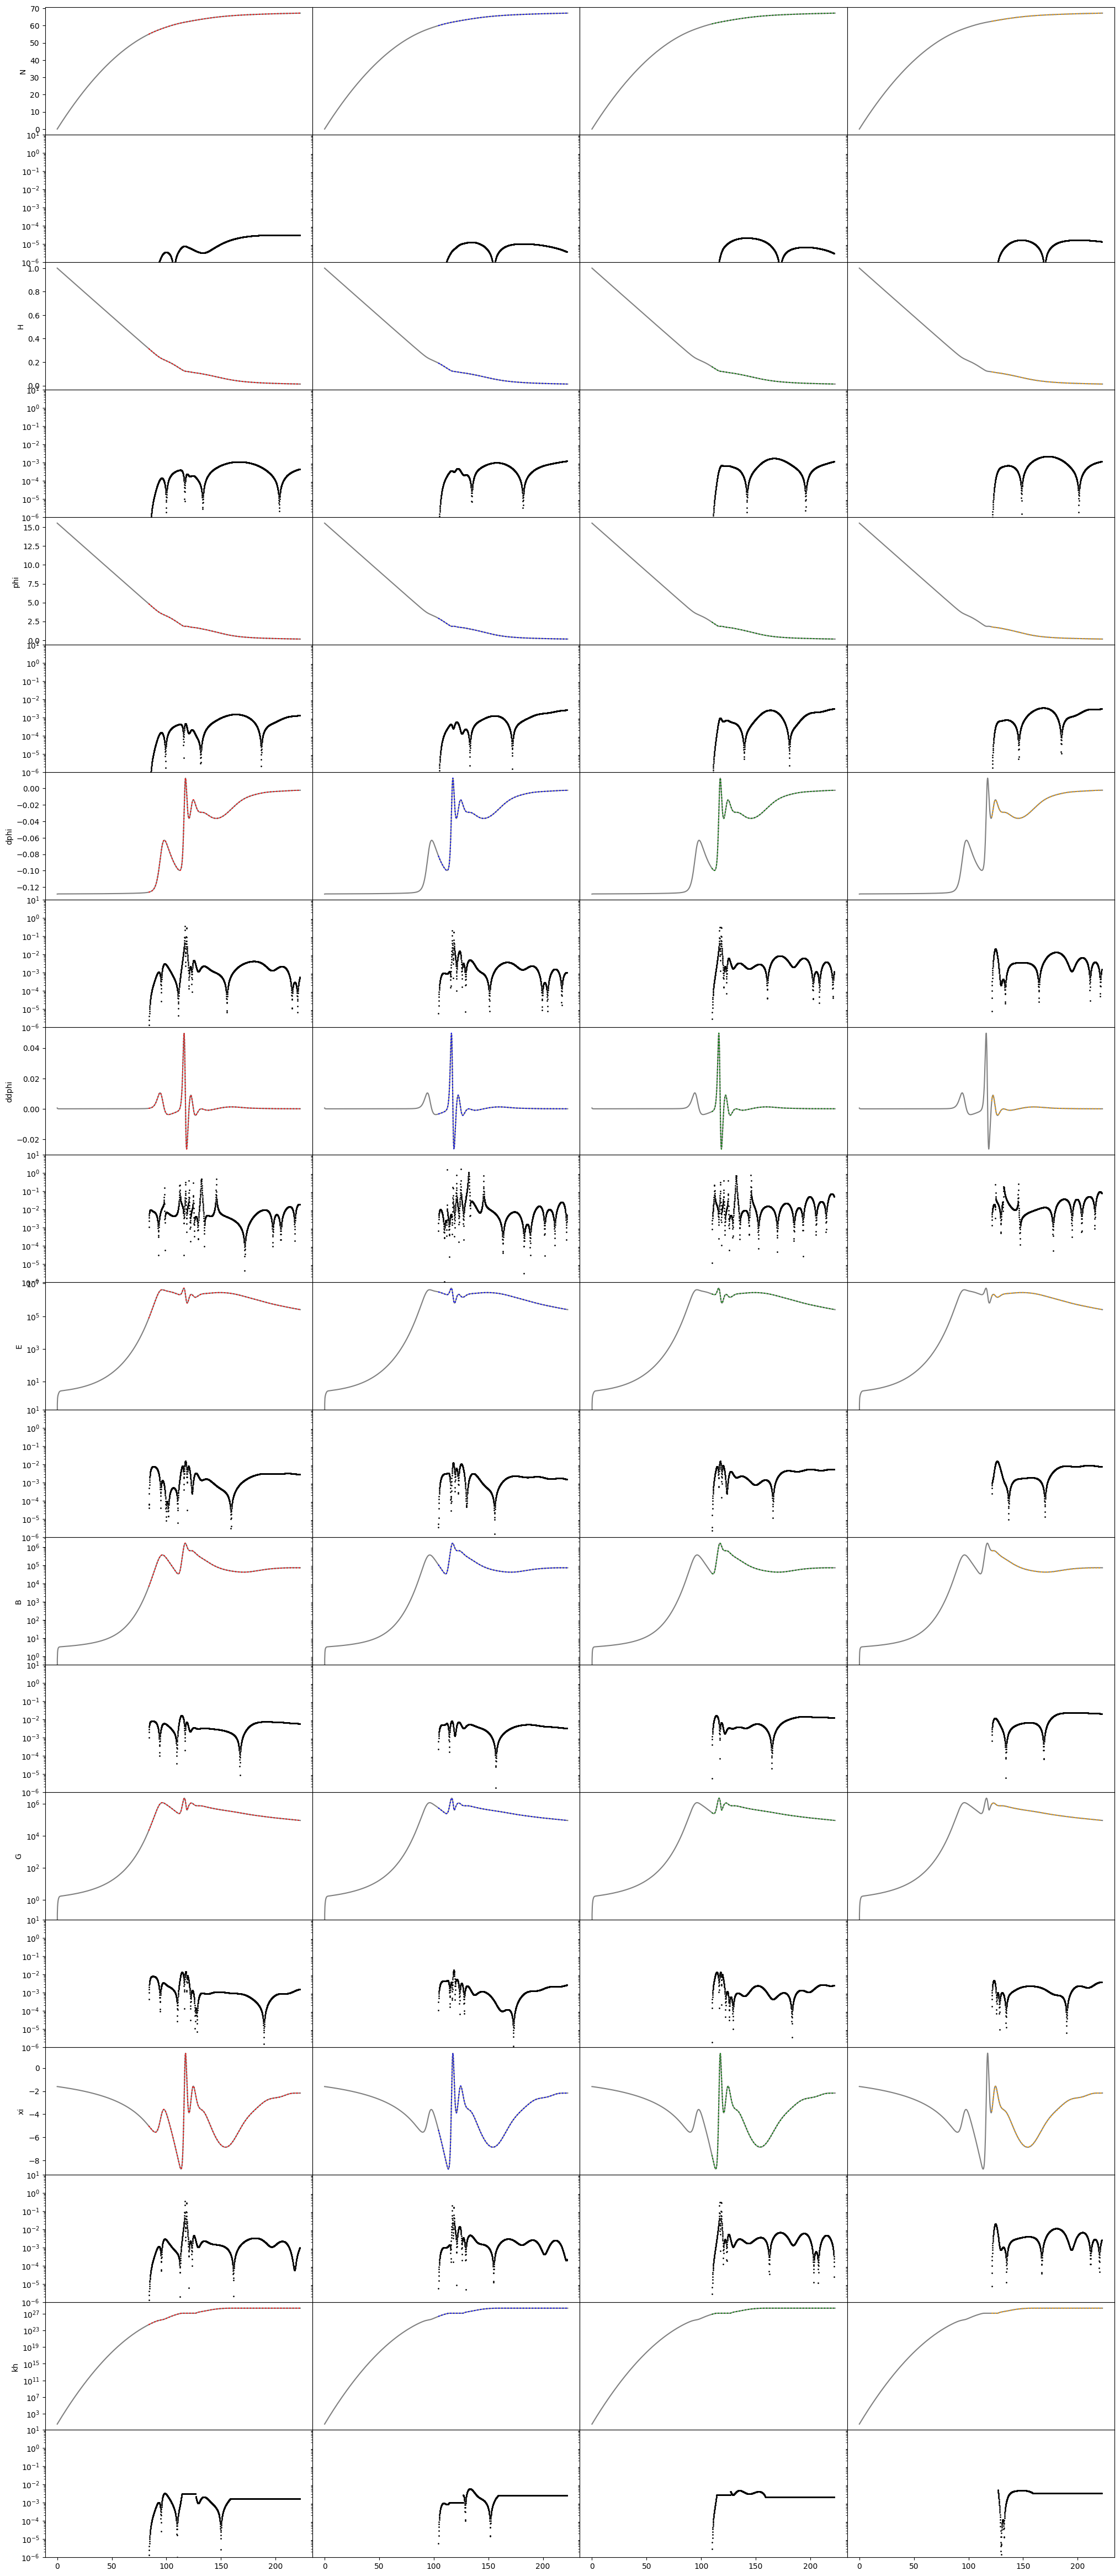

In [ ]:
keys = GN.ValuesList()
keys.remove("t")
keys.remove("a")
color = ["red", "blue", "green", "orange"]

fig, ax = plt.subplots(2*len(keys), 4, sharex=True, figsize=(25, 6*len(keys)))

loglist = ["E", "B", "G", "kh"]
for i, key in enumerate(keys):
    refobj = getattr(GN, key)
    for j, T in enumerate(Temps):
        obj = getattr(T, key)
        if key in loglist:
            ax[2*i,j].plot(GN.t, abs(refobj), color="gray", linestyle="-")
            ax[2*i,j].plot(T.t, abs(obj), color=color[j], linestyle=":")
            ax[2*i,j].set_yscale("log")
        else:
            ax[2*i,j].plot(GN.t, refobj, color="gray", linestyle="-")
            ax[2*i,j].plot(T.t, obj, color=color[j], linestyle=":")

        spl = CubicSpline(GN.t, refobj)(T.t)
        dev = abs(1-obj/spl)
        ax[2*i+1,j].plot(T.t, dev, color="black", linestyle="", marker=".", markersize=2)
        ax[2*i+1,j].set_yscale("log")
        ax[2*i+1,j].set_ylim(1e-6, 1e1)
        if j>0:
            ax[2*i,j].set_yticks([])
            ax[2*i+1,j].set_yticks([])

    ax[2*i,0].set_ylabel(key)

plt.subplots_adjust(hspace=0, wspace=0)

        




    

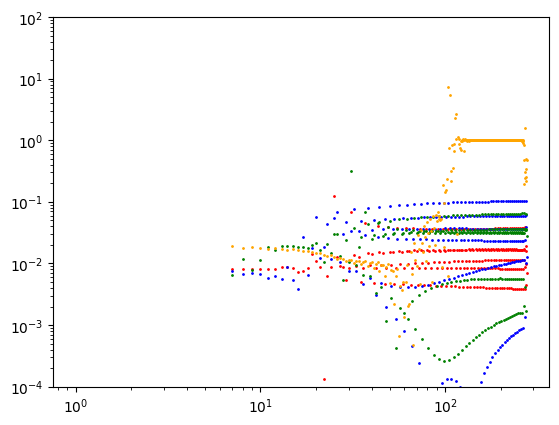

In [ ]:
for k, yini in enumerate(yinis):
    devs = []
    for i in range(yini.size):
        ref = CubicSpline(sol.t, sol.y[i,:])(teval[inds[k]])
        devs.append(abs(1-yini[i]/ref))
    plt.plot(np.arange(yini.size), devs, color=color[k], marker=".", markersize=2, linestyle="")
    plt.yscale("log")
plt.ylim(1e-4, 1e2)
plt.xscale("log")
plt.show()
    
